In [1]:
import sys
import os

package_path = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [2]:
%load_ext autoreload
%autoreload 2

# Main NoteBook

In [3]:
from src.analyzer.core import DataAnalyzer
from src.config.config import load_config
from src.utils.file_util import get_run_scan_directory
config = load_config()
config

ExpConfig(runs=[43], param=ExpParams(hutch=<Hutch.EH1: 'eh1'>, detector=<Detector.JUNGFRAU2: 'jungfrau2'>, xray=<Xray.HARD: 'HX'>, pump_setting=<Hertz.THIRTY: '30HZ'>, x1=0, x2=1, y1=2, y2=3, sdd=1.3, dps=7.5e-05, beam_energy=9.7, sigma_factor=1, wavelength=1.2781876127134046), path=ExpPaths(load_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw', save_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw', param_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw\\DataParameter', image_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw\\Image', mat_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw\\Mat_files2', npz_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw\\Npz_files', tif_dir='Y:\\240608_FXS\\raw_data\\h5\\type=raw\\Tif_files'))

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
def get_npz_file_name(run, scan, config, comment=None):
    npz_dir: str = config.path.npz_dir
    file_name: str = f"run={run:0>4}_scan={scan:0>4}"
    if comment is not None:
        file_name += comment
    return os.path.join(npz_dir, file_name + ".npz")

In [73]:
power_run = {
    1: 37,
    # 2: 38,
    3: 39,
    4: 40,
    # 5: 41,
    6: 42,
    # 7: 43,
    # 8: 44,
    9: 45,
    # 10: 46,
    15: 47,
    # 20: 48
}

In [21]:
power_run = {
    1: 37,
    2: 38,
    3: 39,
    4: 40,
    5: 41,
    6: 42,
    7: 43,
    8: 44,
    9: 45,
    10: 46,
    15: 47,
    20: 48
}

In [22]:
power_run_2 = {
    6: 92,
    8: 91,
    10: 90,
    11: 89,
    12: 88,
    13: 87,
    14: 86,
    15: 85, # 79, 85
    16: 80,
    17: 81,
    18: 82,
    19: 83,
    20: 84
}

In [74]:
power_com_x = {}
power_com_y = {}
power_intensity = {}
image_dir: str = config.path.image_dir
for power, run_num in power_run.items():
    data_file = os.path.join(get_run_scan_directory(image_dir, run_num, 1), "roi_small", "data.csv")
    data_df = pd.read_csv(data_file)
    power_com_x[power] = data_df["poff_com_x"].values - data_df["pon_com_x"].values
    power_com_y[power] = data_df["poff_com_y"].values - data_df["pon_com_y"].values
    power_intensity[power] = data_df["poff_intensity"].values - data_df["pon_intensity"].values

delays = data_df.index.values


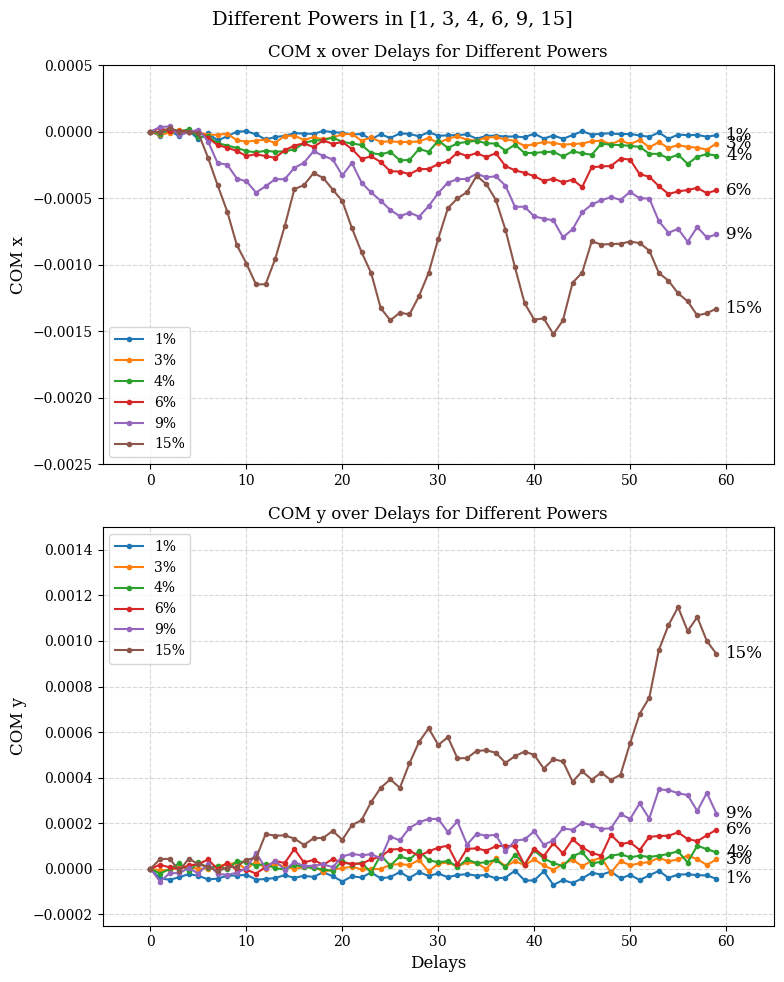

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 글꼴 및 텍스트 설정
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

for power, com_x, com_y in zip(power_run, power_com_x.values(), power_com_y.values()):
    ax[0].plot(delays, com_x, ".-", label=f'{power}%')
    ax[1].plot(delays, com_y, ".-", label=f'{power}%')

    ax[0].text(delays[-1] + 1, com_x[-1], f'{power}%', va='center', ha='left')
    ax[1].text(delays[-1] + 1, com_y[-1], f'{power}%', va='center', ha='left')

fig.suptitle(f"Different Powers in {list(power_run)}", fontsize=14)

ax[0].set_title('COM x over Delays for Different Powers', fontsize=12)
ax[1].set_title('COM y over Delays for Different Powers', fontsize=12)

ax[0].set_ylabel('COM x', fontsize=12)
ax[1].set_ylabel('COM y', fontsize=12)

ax[0].set_xlim(-5, 65)
ax[1].set_xlim(-5, 65)
ax[0].set_ylim(-0.0025, 0.0005)
ax[1].set_ylim(-0.00025, 0.0015)

ax[1].set_xlabel('Delays', fontsize=12)

ax[0].legend(fontsize=10, loc='best')
ax[1].legend(fontsize=10, loc='best')

ax[0].grid(True, linestyle='--', alpha=0.5)
ax[1].grid(True, linestyle='--', alpha=0.5)

ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout();

# Delay at 30 ps

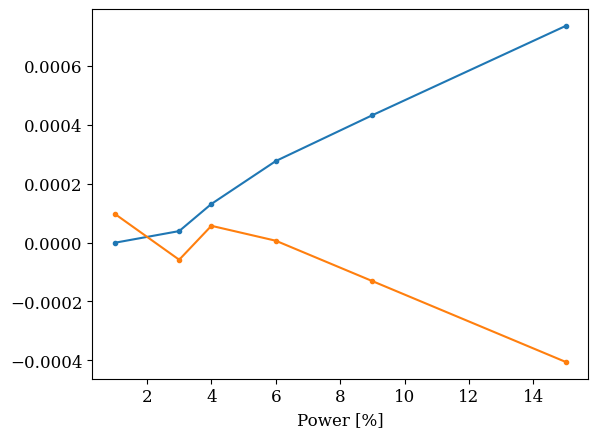

In [75]:
power_com_x_30 = {}
power_com_y_30 = {}

for power, run_num in power_run.items():
    data_file = os.path.join(get_run_scan_directory(image_dir, run_num, 1), "roi_small", "data.csv")
    data_df = pd.read_csv(data_file)
    power_com_x_30[power] = data_df.loc[30]["pon_com_x"]
    power_com_y_30[power] = data_df.loc[30]["pon_com_y"]

plt.plot(power_com_x_30.keys(), power_com_x_30.values(), ".-")
plt.plot(power_com_y_30.keys(), power_com_y_30.values(), ".-")

plt.xlabel("Power [%]");

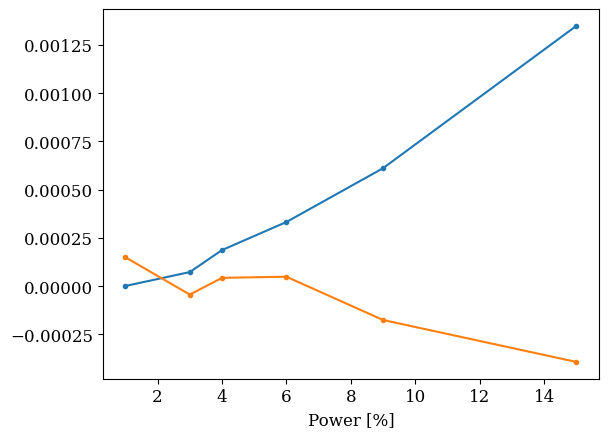

In [12]:
power_com_x_40 = {}
power_com_y_40 = {}

for power, run_num in power_run.items():
    data_file = os.path.join(get_run_scan_directory(image_dir, run_num, 1), "roi_small", "data.csv")
    data_df = pd.read_csv(data_file)
    power_com_x_40[power] = data_df.loc[40]["pon_com_x"]
    power_com_y_40[power] = data_df.loc[40]["pon_com_y"]

plt.plot(power_com_x_40.keys(), power_com_x_40.values(), ".-")
plt.plot(power_com_y_40.keys(), power_com_y_40.values(), ".-")

plt.xlabel("Power [%]");

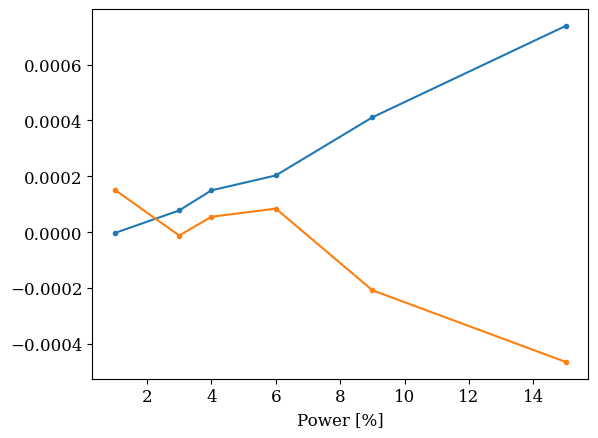

In [13]:
power_com_x_50 = {}
power_com_y_50 = {}

for power, run_num in power_run.items():
    data_file = os.path.join(get_run_scan_directory(image_dir, run_num, 1), "roi_small", "data.csv")
    data_df = pd.read_csv(data_file)
    power_com_x_50[power] = data_df.loc[50]["pon_com_x"]
    power_com_y_50[power] = data_df.loc[50]["pon_com_y"]

plt.plot(power_com_x_50.keys(), power_com_x_50.values(), ".-")
plt.plot(power_com_y_50.keys(), power_com_y_50.values(), ".-")

plt.xlabel("Power [%]");

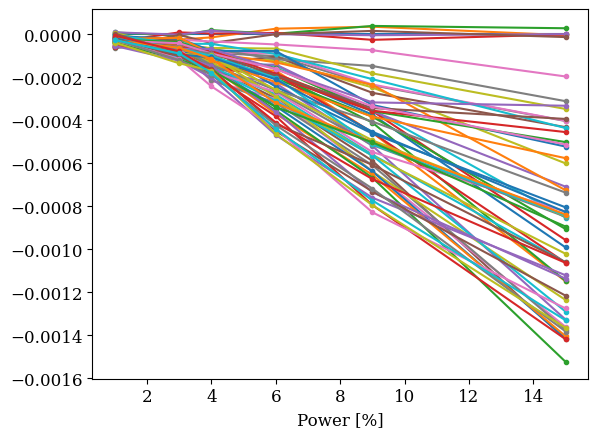

In [76]:
power_com_x = {}
delay_list = delays[::]
for delay in delay_list:
    power_com_x[delay] = {}

    for power, run_num in power_run.items():
        data_file = os.path.join(get_run_scan_directory(image_dir, run_num, 1), "roi_small", "data.csv")
        data_df = pd.read_csv(data_file)
        
        power_com_x[delay][power] = data_df.loc[delay]["poff_com_x"] - data_df.loc[delay]["pon_com_x"]

    plt.plot(power_com_x[delay].keys(), power_com_x[delay].values(), ".-")


plt.xlabel("Power [%]");

In [77]:
power_com_x_2d = []
for delay in power_com_x:
    power_com_x_2d.append(list(power_com_x[delay].values()))
power_com_x_2d = np.array(power_com_x_2d)
power_com_x_2d

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.99234609e-05, -2.36948677e-05, -1.33150310e-05,
         2.69422646e-05,  3.62664722e-05, -3.49078463e-06],
       [ 9.42153281e-06, -5.56378172e-06,  2.02182540e-05,
         3.35158776e-06,  3.98825045e-05,  2.90407755e-05],
       [-3.39835524e-05,  9.85894615e-06,  4.38679155e-06,
         7.40506798e-06, -2.48890446e-05,  1.36828118e-07],
       [ 1.01695811e-05, -8.73644164e-07,  1.73143381e-05,
         1.27568194e-06, -3.39232911e-06,  1.69877177e-06],
       [-5.79677673e-05, -2.29571801e-06, -3.97579259e-05,
         1.32568386e-06,  1.66908593e-05, -1.20692411e-05],
       [-1.20709406e-05, -2.40687321e-05, -3.25245268e-05,
        -4.62988756e-05, -7.31663020e-05, -1.95399310e-04],
       [-6.45103569e-05, -2.17258196e-05, -8.54501938e-05,
        -1.00176623e-04, -2.36150547e-04, -4.02736462e-04],
       [-3.48660339e-05, -1.47247074e-05, -1.034

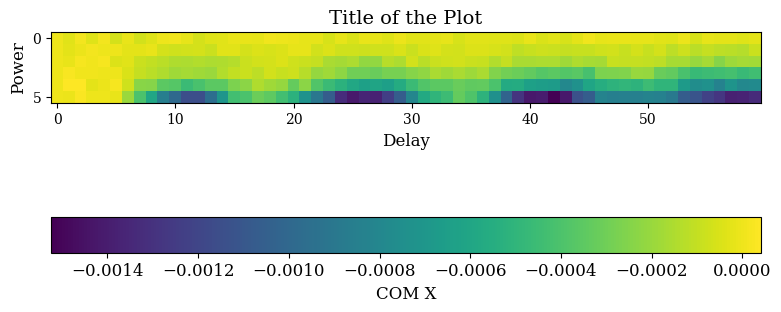

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

im = ax.imshow(power_com_x_2d.T, cmap='viridis')

cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label('COM X', fontsize=12)

ax.set_title('Title of the Plot', fontsize=14)

ax.set_xlabel('Delay', fontsize=12)
ax.set_ylabel('Power', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

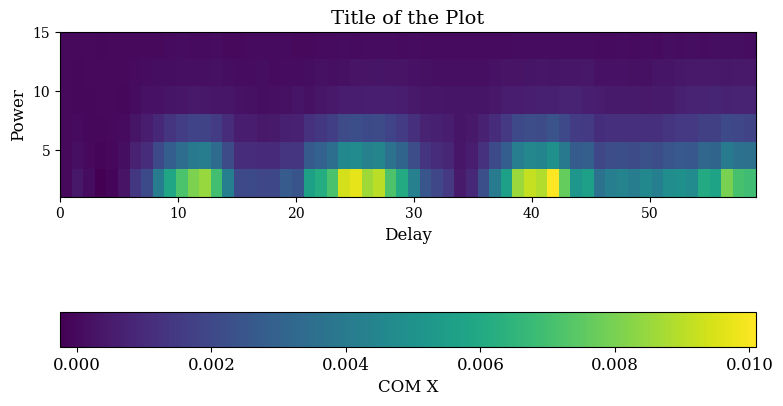

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# 원래 좌표
x = delays
y = np.arange(len(power_run))

# 새로운 좌표
new_x = delays
new_y = list(power_run.keys())
# new_y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# RegularGridInterpolator 생성
interp_func = RegularGridInterpolator(
    (y, x),
    power_com_x_2d.T,
    method='linear', bounds_error=False, fill_value=None
)

# 새로운 좌표에 맞게 데이터 보간
X, Y = np.meshgrid(new_x, new_y)
points = np.column_stack((Y.ravel(), X.ravel()))
new_power_com_x_2d = interp_func(points).reshape(X.shape)

# 그래프 생성
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 이미지 표시
im = ax.imshow(
    -new_power_com_x_2d,
    extent=[new_x.min(), new_x.max(), new_y[0], new_y[-1]]
)

# 컬러바 추가
cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label('COM X', fontsize=12)

# 제목 추가
ax.set_title('Title of the Plot', fontsize=14)

# x축 및 y축 라벨 추가
ax.set_xlabel('Delay', fontsize=12)
ax.set_ylabel('Power', fontsize=12)

# 틱 라벨 크기 조정
ax.tick_params(axis='both', which='major', labelsize=10)

# 그래프 표시
plt.tight_layout()
plt.show()